### Feature selection tool

In this code, we first import the training and validation datasets and select only columns of float64 data type. We then select only the columns that are in both dataframes, plus sim_ID and timeStep, and fit a MinMaxScaler to the training data. We apply the scaler to the data, convert the normalized data back to a dataframe, and save the scaler for later use.

Next, we calculate the correlation matrix and generate a heatmap to visualize the correlations. We then perform correlation-based feature selection, selecting features with a correlation coefficient above a given threshold. We plot the selected features and store the selected features and fit rows.

We then perform column selection and scaling again on the selected features, unscale the data, and convert the unscaled data back to a dataframe. We then rescale the data with the same scaler and add back the 'sim_ID' column. Finally, we store the scaler for later use. Overall, this code performs data preprocessing and feature selection on the training and validation datasets, making it easier to train and validate a machine learning model.

In [1]:
# importing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
# importing the training df and validation df
%store -r df_training
%store -r df_validation

In [3]:
# select only columns of float64 data type
df_floats_training = df_training.select_dtypes(include=['float64'])
df_floats_validation = df_validation.select_dtypes(include=['float64'])

# select only the columns that are in both DataFrames, plus sim_ID and timeStep
common_columns = df_floats_training.columns.intersection(df_floats_validation.columns).union(['sim_ID', 'timeStep'])

# select only the common columns
df_floats_training_only = df_training[common_columns]
df_floats_validation_only = df_validation[common_columns]
df_training_dropped = df_floats_training_only.drop(columns=['sim_ID'])
df_validation_dropped = df_floats_validation_only.drop(columns=['sim_ID'])

# Fit the scaler
scaler_1 = MinMaxScaler().fit(df_training_dropped)

# Apply the scaler to your data
train_data_normalized = scaler_1.transform(df_training_dropped)
validation_data_normalized = scaler_1.transform(df_validation_dropped)

# Convert the normalized data back to a dataframe
train_data_normalized = pd.DataFrame(train_data_normalized, columns=df_training_dropped.columns)
validation_data_normalized = pd.DataFrame(validation_data_normalized, columns=df_validation_dropped.columns)

# save the scaler for inverse scaling later
min_value_BHP = scaler_1.data_min_[df_training_dropped.columns.get_loc('DownholePressure')]
max_value_BHP = scaler_1.data_max_[df_training_dropped.columns.get_loc('DownholePressure')]

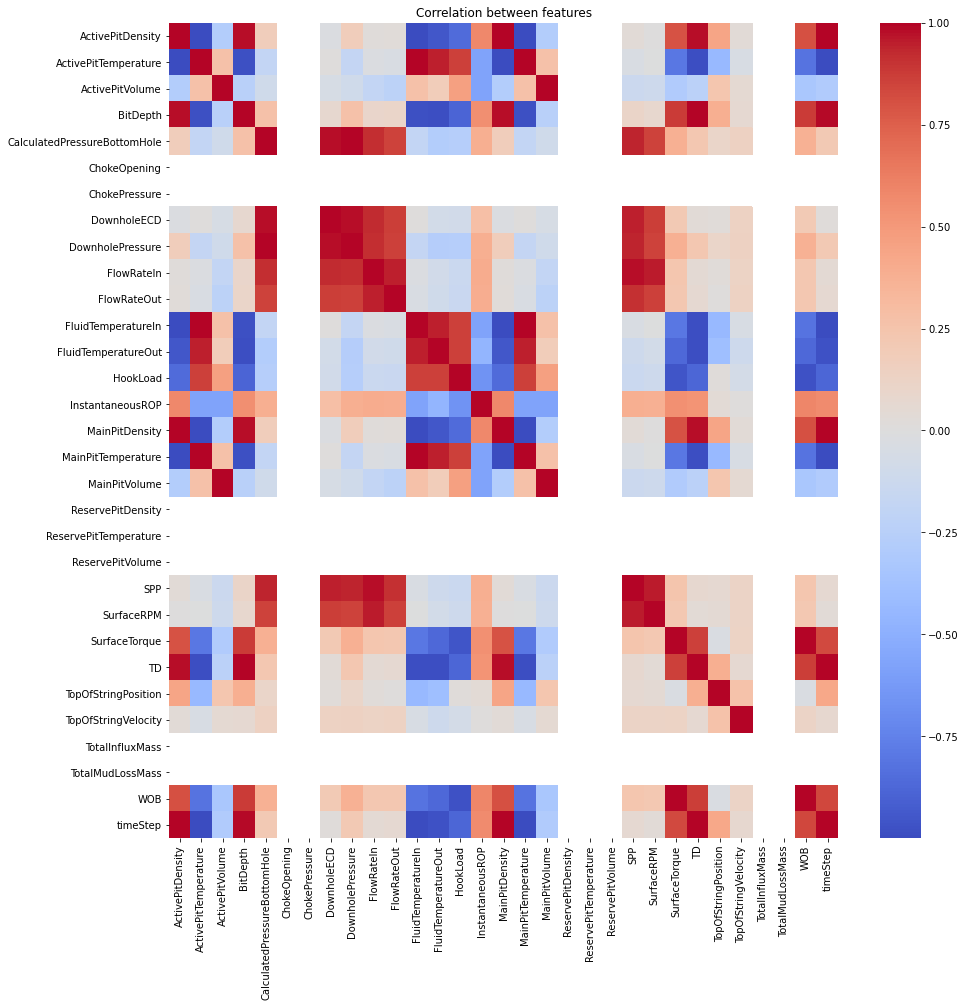

In [4]:
# Calculate the correlation matrix
corr = train_data_normalized.corr()

# Generate a heatmap to visualize the correlations
plt.figure(figsize=(15, 15))
plt.title('Correlation between features')
sns.heatmap(corr, annot=False, cmap='coolwarm')

# Perform correlation-based feature selection
target_col = 'DownholePressure' # Replace 'target' with the name of your target column
corr_threshold = 0.16 # Set the correlation threshold for feature selection
corr_target = abs(corr[target_col])
selected_features = corr_target[corr_target >= corr_threshold].index.tolist()

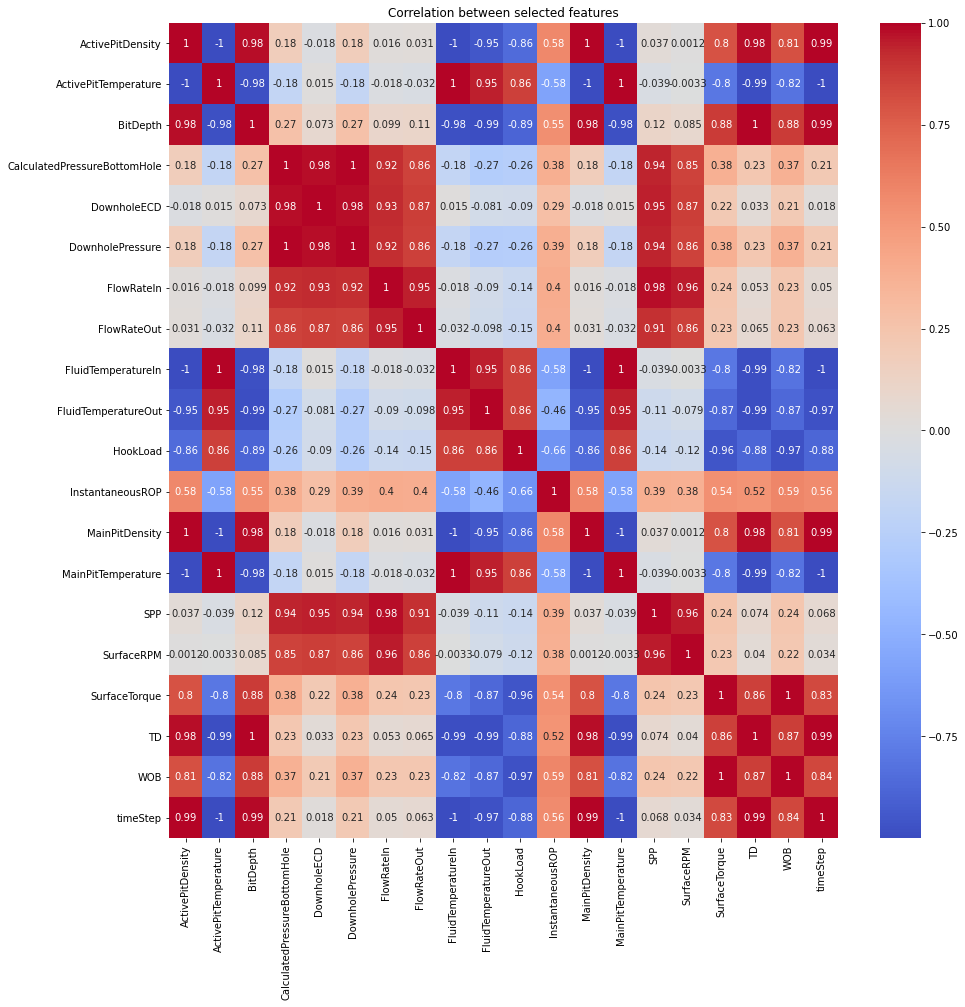

In [10]:
# Plot the selected features
plt.figure(figsize=(15,15))
sns.heatmap(train_data_normalized.loc[:, selected_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between selected features')
plt.show()

In [28]:
# Store the selected features, fit rows and create the tags list
tags = fit_columns.copy()
if "timeStep" in tags:
    tags.remove("timeStep")

%store target_col
%store tags
%store selected_features

Stored 'target_col' (str)
Stored 'tags' (list)
Stored 'selected_features' (list)


In [29]:
tags

['ActivePitDensity',
 'ActivePitTemperature',
 'BitDepth',
 'CalculatedPressureBottomHole',
 'DownholeECD',
 'DownholePressure',
 'FlowRateIn',
 'FlowRateOut',
 'FluidTemperatureIn',
 'FluidTemperatureOut',
 'HookLoad',
 'InstantaneousROP',
 'MainPitDensity',
 'MainPitTemperature',
 'SPP',
 'SurfaceRPM',
 'SurfaceTorque',
 'TD',
 'WOB']

In [8]:
# Perform column selection and scaling again
train_data_selected = train_data_normalized[selected_features]
validation_data_selected = validation_data_normalized[selected_features]

# Unscale the data
train_data_unscaled = scaler_1.inverse_transform(train_data_normalized)
validation_data_unscaled = scaler_1.inverse_transform(validation_data_normalized)

# Convert the unscaled data back to a dataframe
train_data_unscaled = pd.DataFrame(train_data_unscaled, columns=df_training_dropped.columns)
validation_data_unscaled = pd.DataFrame(validation_data_unscaled, columns=df_validation_dropped.columns)

# Rescale the data with the same scaler
scaler_2 = MinMaxScaler().fit(train_data_selected)

# fit_columns = train_data_selected.columns
fit_columns = train_data_selected.columns.tolist()

train_data_scaled = scaler_2.transform(train_data_selected)
validation_data_scaled = scaler_2.transform(validation_data_selected)

# Convert the scaled data back to a dataframe
train_data_scaled = pd.DataFrame(train_data_scaled, columns=train_data_selected.columns)
validation_data_scaled = pd.DataFrame(validation_data_scaled, columns=validation_data_selected.columns)

# Add back the 'sim_ID' column
train_data_selected = train_data_selected.join(df_floats_training_only['sim_ID'])
validation_data_selected = validation_data_selected.join(df_floats_validation_only['sim_ID'])

Stored 'train_data_selected' (DataFrame)
Stored 'validation_data_selected' (DataFrame)


In [9]:
# Store the scaler and columns used to fit the scaler
%store fit_columns
%store scaler_2

# Store the dataframes
%store train_data_selected
%store validation_data_selected

Stored 'fit_columns' (list)
Stored 'scaler_2' (MinMaxScaler)
Stored 'train_data_selected' (DataFrame)
Stored 'validation_data_selected' (DataFrame)
